# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

COURSE: INTRODUCTION TO DEEP NEURAL NETWORKS / 
================================================
PENGANTAR DEEP NEURAL NETWORKS
=====================================
AUTHOR: DARMAWAN UTOMO, PH.D.
=====================================
SATYA WACANA CHRISTIAN UNIVERSITY
=====================================

DATASET: MNIST
FRAMEWORK: KERAS-TENSORFLOW
LOAD DATASET
SAVE DATASET
ARCHITECTURE MODEL
COMPILE MODEL
FIT MODEL
EVALUATE MODEL
TRAINING DAN TESTING LOSS AND ACCURACY
SAVE MODEL
LOAD MODEL
PREDICT MODEL
CONFUSION MATRIX


Soal-soal ada di cell paling bawah.

## Setup

In [1]:
# SIAPKAN SEMUA LIBRARY YANG AKAN DIPERGUNAKAN DI COURSE INI:
# MNIST ADALAH SEBUAH PROBLEM UNTUK MENGKLASIFIKASIKAN ANGKA DALAM IMAGE UKURAN 28 PIKSEL X 28 PIKSEL
# DATASETNYA MEMILIKI 60.000 SAMPEL UNTUK TRAINING DAN 10.000 SAMPEL UNTUK TESTING
# MAMPUKAN ANDA MEMBUAT PROGRAM SEPERTI INI HINGGA DIDAPATKAN AKURASI YANG PALING BAIK?

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## Prepare the data

In [2]:
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


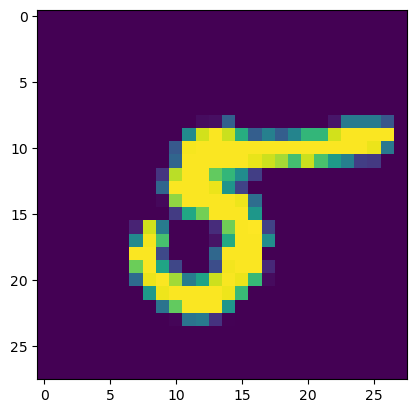

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = load_data('/kaggle/input/mnist-numpy/mnist.npz')

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# plot one of image
img = x_test[9998,:,:,0]

plt.imshow(img)

In [4]:
# Menyimpan dataset x_train dan x_test ke dalam bentuk npz compressed
# y_train dan y_test belum disimpan pada contoh ini

# save numpy array as npz file

from numpy import asarray
from numpy import savez_compressed
# save to npy file
savez_compressed('nmist_xtrain.npz', x_train)
savez_compressed('nmist_xtest.npz', x_test)
savez_compressed('nmist_ytrain.npz', y_train)
savez_compressed('nmist_ytest.npz', y_test)


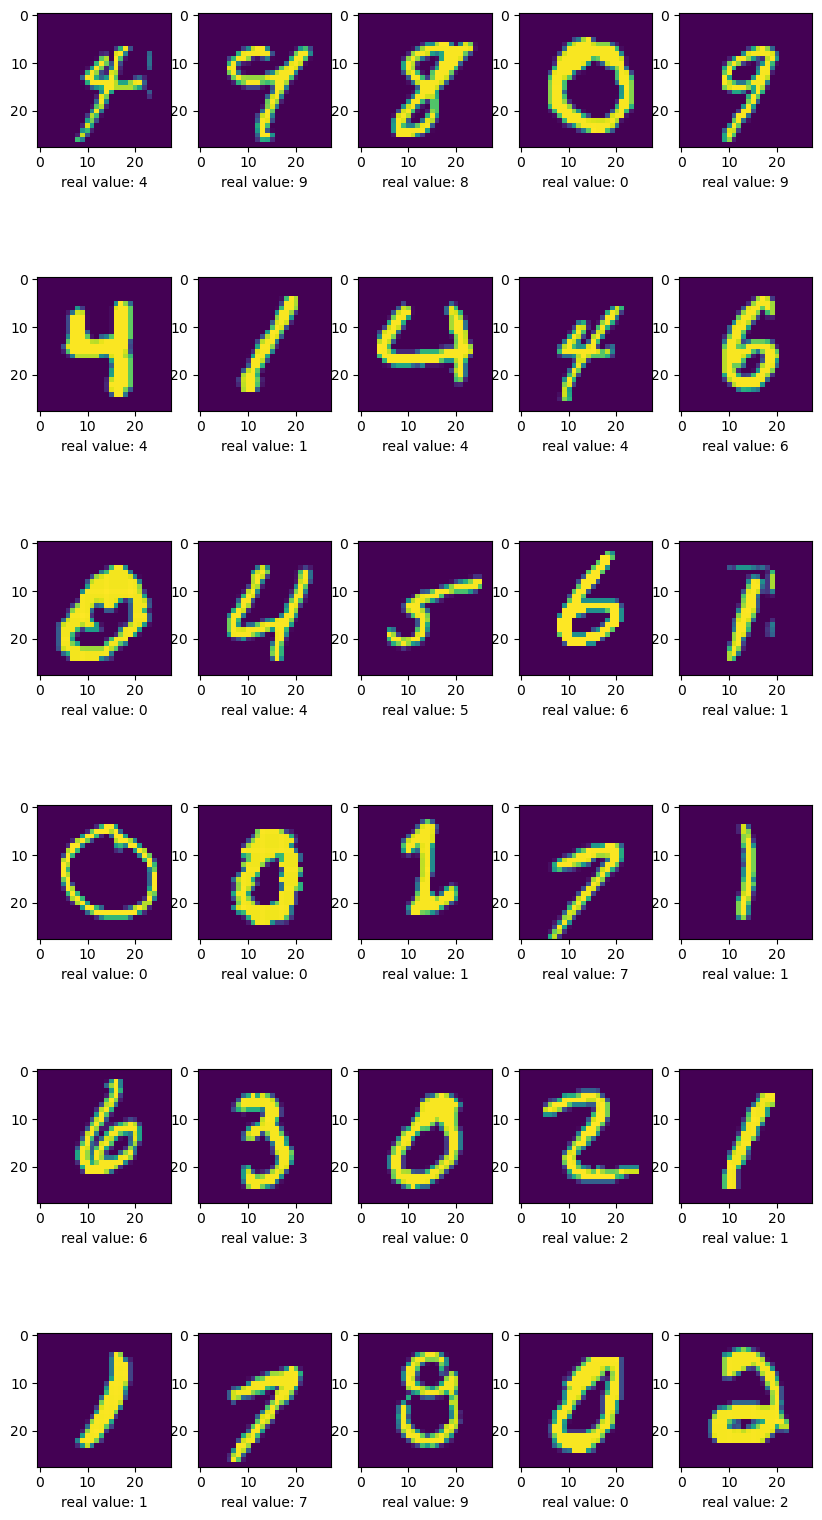

In [5]:
""" Menampilkan Grafik dengan Matplotlib.
Silakan dipelajari Matplotlib karena hampir sebagian besar grafik dan 
image bisa dibuat dengan library ini"""

#====gambar 2D ini masih random, ganti dengan image tertentu misal yang diambil dari MNIST
#anda bisa menambahkan judul pada setiap gambar

import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 20)) #mengatur ukuran tertampil di layar monitor 14 inch x 5 inch
columns = 5
rows = 6
for i in range(1, columns*rows +1):
    img = x_train[52+i]
    y = y_train[52+i]
    trueLabel=0
    for idx, realY in enumerate(y):
        if realY != 0:
            trueLabel = idx
            break
    ax = fig.add_subplot(rows, columns, i)
    ax.set_xlabel("real value: " + str(trueLabel))
    plt.imshow(img)
plt.show()

# Build the model

In [6]:
# MODEL INI DIAMBIL DARI KERAS.IO

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

# LIHAT JUMLAH PARAMETER YANG DIBUAT PADA KASUS INI

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Train the model

In [7]:
# PERHATIKAN batch_size, EPOCH, waktu training, accuracy dan loss saat TRAINIG DAN VALIDATION
batch_size = 64
epochs = 10

model.compile(optimizer="adam",loss="categorical_crossentropy", metrics=["accuracy"])

history1 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 23s 26ms/step - loss: 0.2753 - accuracy: 0.9169 - val_loss: 0.0665 - val_accuracy: 0.9813
Epoch 2/10
844/844 [==============================] - 22s 26ms/step - loss: 0.0960 - accuracy: 0.9708 - val_loss: 0.0482 - val_accuracy: 0.9860
Epoch 3/10
844/844 [==============================] - 22s 26ms/step - loss: 0.0744 - accuracy: 0.9778 - val_loss: 0.0420 - val_accuracy: 0.9883
Epoch 4/10
844/844 [==============================] - 23s 27ms/step - loss: 0.0620 - accuracy: 0.9802 - val_loss: 0.0346 - val_accuracy: 0.9895
Epoch 5/10
844/844 [==============================] - 23s 27ms/step - loss: 0.0551 - accuracy: 0.9823 - val_loss: 0.0336 - val_accuracy: 0.9905
Epoch 6/10
844/844 [==============================] - 22s 26ms/step - loss: 0.0485 - accuracy: 0.9842 - val_loss: 0.0318 - val_accuracy: 0.9917
Epoch 7/10
844/844 [==============================] - 22s 26ms/step - loss: 0.0442 - accuracy: 0.9859 - val_loss: 0.0326 - val_accuracy:

In [8]:
"""
Setelah melakukan training, bobot (W) dan Bias (b) masih ada di dalam memori!
Untuk menyimpan dan mengambil BOBOT/WEIGHT dan BIAS untuk penggunaan berikutnya (tanpa melakukan training lagi)
maka perlu disimpan. Ada dua file yang disimpan: MODEL dan BOBOT,Bias

Berikut ini adalah salah satu contoh sederhana:"
Nama file Model: NMIST_model.json
Nama file Bobot_Bias: NMIST_weights.h5

"""

# Serialkan model ke JSON
model_json = model.to_json()
with open("MNIST_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("MNIST_weights.h5")
print("Saved model to disk")
 


Saved model to disk


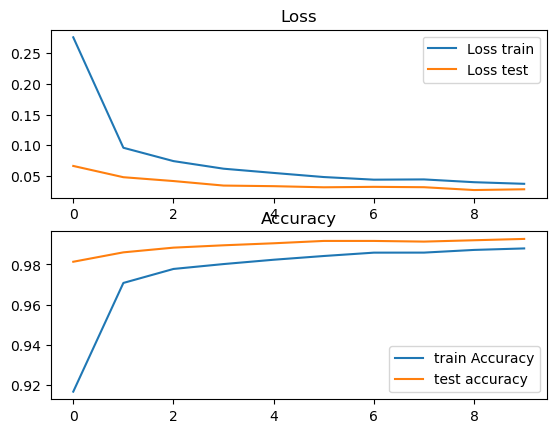

In [9]:
# example of plotting learning curves
# plot loss during training

import matplotlib.pyplot as plt

plt.subplot(211)
plt.title("Loss")
plt.plot(history1.history['loss'], label='Loss train')
plt.plot(history1.history['val_loss'], label='Loss test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history1.history['accuracy'], label='train Accuracy')
plt.plot(history1.history['val_accuracy'], label='test accuracy')
plt.legend()

plt.show()

In [10]:
tes = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [11]:
x_test.shape

(10000, 28, 28, 1)

In [12]:
print(tes)

[[3.26446842e-10 2.74738654e-09 5.48308526e-06 ... 9.99992669e-01
  1.38223779e-08 1.26643533e-06]
 [1.04978847e-06 1.39350195e-05 9.99939024e-01 ... 4.85521588e-11
  3.58357306e-06 4.97772938e-13]
 [2.13244604e-08 9.99957144e-01 3.81136431e-07 ... 6.14592409e-06
  3.87636692e-06 1.87895051e-08]
 ...
 [1.96373230e-11 4.53314852e-09 1.75276668e-11 ... 1.45601348e-07
  1.23412042e-06 4.48929626e-07]
 [4.75732449e-08 3.00803016e-14 4.82899387e-10 ... 1.54502851e-11
  1.85440891e-04 8.77837181e-09]
 [1.02998683e-06 1.08814060e-11 1.16161925e-06 ... 6.92366433e-12
  5.28831106e-06 7.51585738e-11]]


## Evaluate the trained model

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02492019347846508
Test accuracy: 0.9909999966621399


In [14]:

"""
Menginterpretasikan jawaban mesin dari data probabilistik, 
LIHAT NILAI YANG PALING BESAR

0 = 8.4557605e-04 
1 = 6.3702143e-12 
2 = 8.3242345e-01 --> 1
3 = 1.6209913e-02 
4 = 1.0394131e-12

5 = 5.2754462e-08 
6 = 1.0671304e-06 
7 = 2.5201248e-09 
8 = 1.5050499e-01 --> 2
9 = 1.5018032e-05

Cocokan dengan y_test [3330]

"""
def cekTest(index=0):
#     index = 3330
    contoh = x_test[index]
    contoh = contoh.reshape((1,28,28,1))
    y_contoh = model.predict(contoh)
    print(y_contoh)

    y = y_test[index]
    realValue=0
    for idx, ye in enumerate(y):
        if ye != 0:
            realValue = idx
            break

    plt.subplot(211)
    plt.title("Real Value: " + str(realValue))
    plt.bar(range(0,10), y_contoh.squeeze())
    plt.xticks(range(0,10))
    plt.legend()

    plt.subplot(212)
    plt.imshow(contoh.reshape(28,28,1))


1/1 [==============================] - 0s 20ms/step
[[6.69991970e-12 4.96335584e-10 3.94791769e-11 2.48126363e-11
  9.99994397e-01 7.72361286e-09 6.15694605e-12 1.01744085e-07
  4.35196981e-08 5.44674276e-06]]


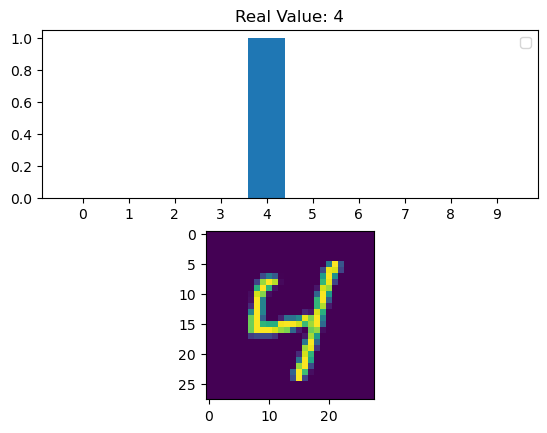

In [15]:
'''
LABEL DARI y_test[3330] adalah:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
--> kode untuk Label              0  1  2  3  4  5  6  7  8  9    
'''
cekTest(3332)

In [16]:
model.save('model-mnist-01.h5')

In [17]:
del model

In [18]:
from tensorflow.keras.models import load_model
# load the model from file
model = load_model('/kaggle/working/model-mnist-01.h5')

Bahan-bahan lainnya dapat dipelajari dari situs ini. Jason Brown Lee sangat banyak memberikan contoh-contoh yang bisa diaplikasikan.

https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

In [19]:
"""
PROSES TRAINING SUDAH SELESAI DILAKUKAN DI ATAS, 
SEKARANG ADALAH MENANAMKAN MODEL, BOBOT KITA DI MESIN SEBAGAI MESIN AI/PENDUGA (INFERENCE ENGINE)
DATA YANG DIPERGUNAKAN DALAM KASUS INI ADALAH DATA TEST SAJA

Urutan langkah-langkahnya adalah sebagai berikut:
0. Load library numpy, tensorflow, keras, matplotlib, sckit_learn
1. Load dataset untuk pengujian --> x_test
2. Load model.json dan weight.h5
3. (mesin penduga sudah siap)
4. Jalankan model.predict_classes(x_test)
5. Karena data x_test sebanya 10.000 sampel maka hasil prediksinya juga 10.000
6. Uji performance untuk klassifikasi dengan confussion matrix
7. Tampilkan beberapa hasil yang benar dan salah
"""

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers



In [20]:
# Meletakkan dataset dari file ke dalam memori kerja

# load numpy array from npz file
from numpy import load
# load dict of arrays

dict_data = load('nmist_xtrain.npz')
# extract the first array
x_train = dict_data['arr_0']

dict_data = load('nmist_xtest.npz')
# extract the first array
x_test = dict_data['arr_0']

dict_data = load('nmist_ytrain.npz')
# extract the first array
y_train = dict_data['arr_0']

dict_data = load('nmist_ytest.npz')
# extract the first array
y_test = dict_data['arr_0']



print('x_train.shape ', x_train.shape )
print('x_test.shape ', x_test.shape)
print('y_train.shape ', y_train.shape )
print('y_test.shape ', y_test.shape)


x_train.shape  (60000, 28, 28, 1)
x_test.shape  (10000, 28, 28, 1)
y_train.shape  (60000, 10)
y_test.shape  (10000, 10)


In [21]:
%pwd

'/kaggle/working'

In [22]:
# Untuk mengambil file model dan bobot lalu diletakkan di memori, digunakan fungsi sebagai berikut ini:
from tensorflow.keras.models import Sequential, model_from_json

# load json and create model
json_file = open('./MNIST_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("MNIST_weights.h5")
print("Loaded model and BOBOT MNIST from disk")

Loaded model and BOBOT MNIST from disk


In [23]:
# Class prediction (untuk kasus klasifikasi pada MNIST) 

# make a prediction
y_new = model.predict(x_test)
# show the inputs and predicted outputs
for i in range(3): #dimisalkan yang ditampilkan hanya 5 data saja
 print(" Predicted=%s" % (y_new[i]))


313/313 [==============================] - 2s 6ms/step
 Predicted=[3.2644684e-10 2.7473865e-09 5.4830853e-06 5.2502122e-07 6.2602386e-13
 5.0256315e-09 4.0871354e-16 9.9999267e-01 1.3822378e-08 1.2664353e-06]
 Predicted=[1.04978847e-06 1.39350195e-05 9.99939024e-01 5.11151690e-08
 3.86640164e-10 9.05548466e-12 4.22983067e-05 4.85521588e-11
 3.58357306e-06 4.97772938e-13]
 Predicted=[2.1324460e-08 9.9995714e-01 3.8113643e-07 2.0718254e-09 3.1967342e-05
 7.8071993e-09 2.6933736e-07 6.1459241e-06 3.8763669e-06 1.8789505e-08]


In [24]:
# UJI PERFORMANSI dari sebuah MODEL 


"""
Ada 2 axis yaitu hasil prediksi dan LABEL (supervised learning)

True bermakna dua untuk kelas binary. Oleh karena itu perlu didefinisikan yang dimaksudkan sebagai True yang A atau B. 
Misalnya True adalah CAT dan yang lain adalah DOG, akan berbeda 
   kalau True adalah DOG dan yang lain adalah CAT!

Akurasi masih belum bisa membedakan 2 makna event FP dan FN.

“TP = true positive” for correctly predicted event values.
“FP = false positive” for incorrectly predicted event values.
“TN = true negative” for correctly predicted no-event values.
“FN = false negative” for incorrectly predicted no-event values.

Performansi ukur yang lain adalah True Positive Rate (TPR), False Positive Rate (FPR), dll
Semua alat ukur ini dipergunakan sesuai dengan kasus yang ingin dianalisa.

Tentang topik Confusion Matrix dapat dilihat di Wikipedia.

Library yang terdapat di scikit_learn:
https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix


pada contoh MNIST terdapat 10 kelas angka dari 0 hingga 9
Confusion matrixnya dapat dilihat pada contoh sbb:

from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

outputnya:
array([[2, 0, 0],      <-- baris y_true (actual) = 0
       [0, 0, 1],      <-- baris y_true (actual) = 1
       [1, 0, 2]])     <-- baris y_true (actual) = 2
       
              ^---   kolom y_prediction = 2
           ^---   kolom y_prediction = 1
        ^---   kolom y_prediction = 0

"""

'\nAda 2 axis yaitu hasil prediksi dan LABEL (supervised learning)\n\nTrue bermakna dua untuk kelas binary. Oleh karena itu perlu didefinisikan yang dimaksudkan sebagai True yang A atau B. \nMisalnya True adalah CAT dan yang lain adalah DOG, akan berbeda \n   kalau True adalah DOG dan yang lain adalah CAT!\n\nAkurasi masih belum bisa membedakan 2 makna event FP dan FN.\n\n“TP = true positive” for correctly predicted event values.\n“FP = false positive” for incorrectly predicted event values.\n“TN = true negative” for correctly predicted no-event values.\n“FN = false negative” for incorrectly predicted no-event values.\n\nPerformansi ukur yang lain adalah True Positive Rate (TPR), False Positive Rate (FPR), dll\nSemua alat ukur ini dipergunakan sesuai dengan kasus yang ingin dianalisa.\n\nTentang topik Confusion Matrix dapat dilihat di Wikipedia.\n\nLibrary yang terdapat di scikit_learn:\nhttps://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix\n\n\npada contoh MNI

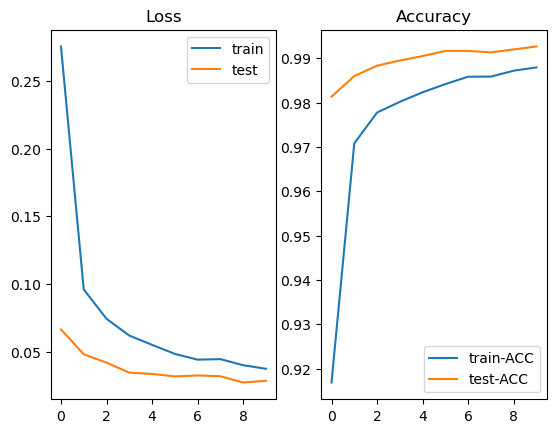

In [25]:
# example of plotting learning curves
# plot loss during training


plt.subplot(121)
plt.title('Loss')
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history1.history['accuracy'], label='train-ACC')
plt.plot(history1.history['val_accuracy'], label='test-ACC')
plt.legend()

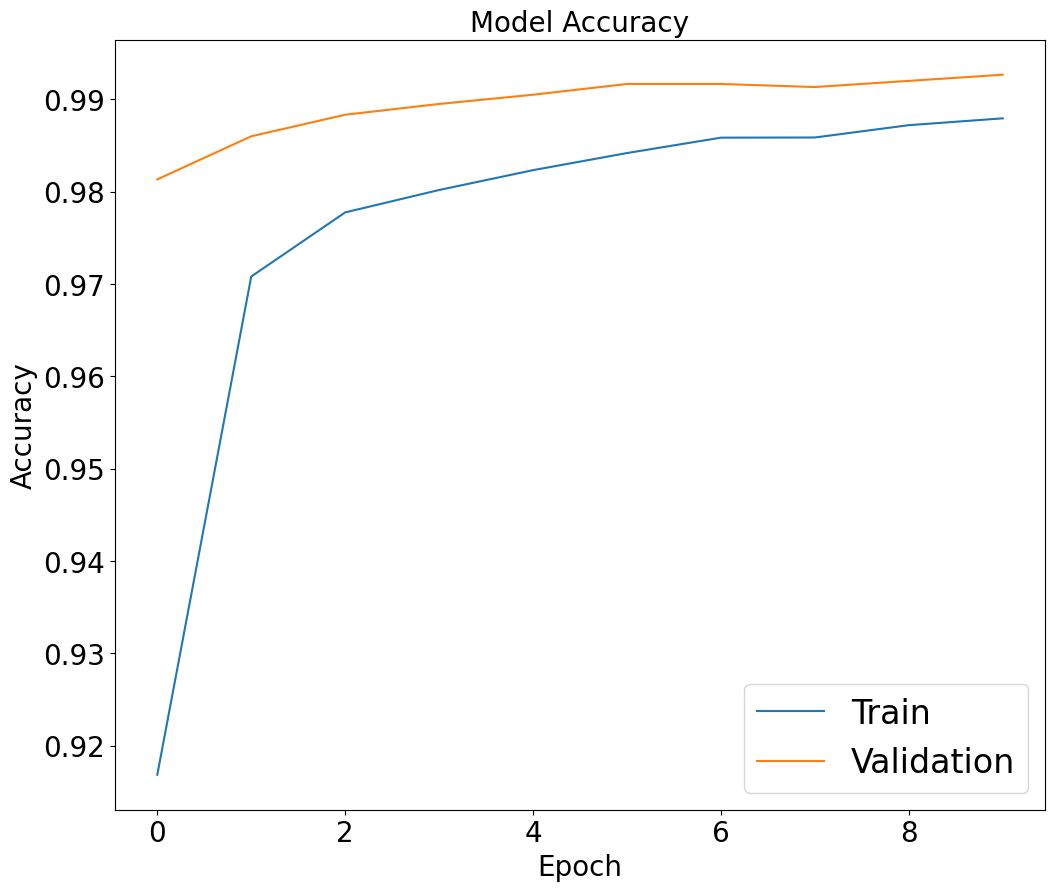

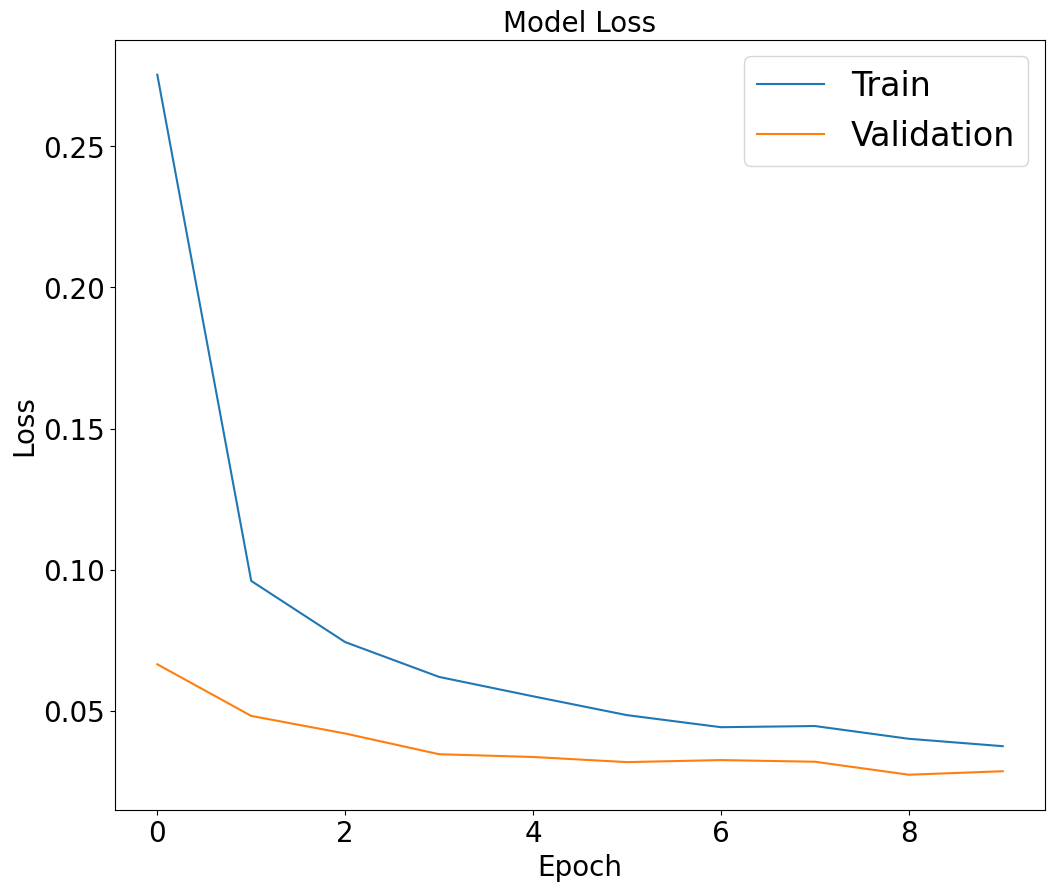

In [26]:
#print(history.history.keys())
plt.rcParams['figure.figsize'] = (12, 10)

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [27]:

MEDIUM_SIZE = 12
BIGGER_SIZE = 14


plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# --> sampai tensorflow 2.5 saja ypred = model.predict_classes(x_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


ypred = model.predict(x_test) 
classes_x=np.argmax(ypred,axis=1)

classes_y= np.argmax(y_test, axis=1)

yclass = [0,1,2,3,4,5,6,7,8,9]
yclassdisp = ['Nol', 'Satu', 'Dua', 'Tiga', 'Empat', 'Lima', 'Enam', 'Tujuh', 'Delapan', 'Sembilan']

a = classes_y
cm = confusion_matrix(a, classes_x, labels=yclass)

cm


313/313 [==============================] - 2s 6ms/step


array([[ 976,    1,    1,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1133,    0,    0,    0,    0,    1,    1,    0,    0],
       [   1,    2, 1019,    0,    1,    0,    3,    6,    0,    0],
       [   0,    0,    2, 1003,    0,    3,    0,    1,    1,    0],
       [   0,    0,    0,    0,  975,    0,    1,    1,    2,    3],
       [   0,    0,    0,    4,    0,  887,    1,    0,    0,    0],
       [   2,    2,    1,    0,    1,    3,  947,    0,    2,    0],
       [   0,    3,    8,    0,    0,    0,    0, 1015,    1,    1],
       [   2,    0,    1,    0,    0,    1,    0,    3,  966,    1],
       [   0,    3,    1,    0,    5,    5,    0,    3,    3,  989]])

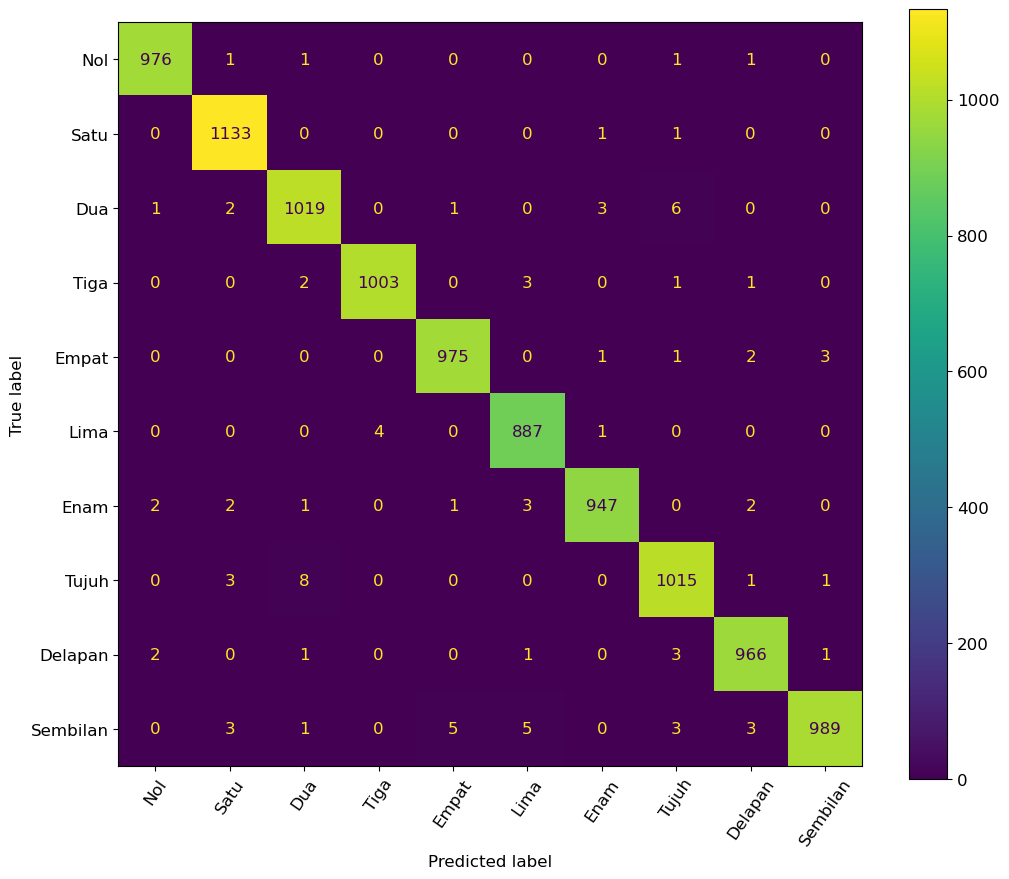

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=yclassdisp)
disp.plot(xticks_rotation=55) 

In [29]:
print (a [:5])
print (a.shape)

[7 2 1 0 4]
(10000,)


In [30]:
print(ypred[:5])
print (ypred.shape)

[[3.26446842e-10 2.74738654e-09 5.48308526e-06 5.25021221e-07
  6.26023864e-13 5.02563147e-09 4.08713541e-16 9.99992669e-01
  1.38223779e-08 1.26643533e-06]
 [1.04978847e-06 1.39350195e-05 9.99939024e-01 5.11151690e-08
  3.86640164e-10 9.05548466e-12 4.22983067e-05 4.85521588e-11
  3.58357306e-06 4.97772938e-13]
 [2.13244604e-08 9.99957144e-01 3.81136431e-07 2.07182538e-09
  3.19673418e-05 7.80719933e-09 2.69337363e-07 6.14592409e-06
  3.87636692e-06 1.87895051e-08]
 [9.99951541e-01 4.04273484e-13 1.28222655e-06 5.42725143e-10
  5.88644653e-08 1.79133920e-07 4.47312996e-05 1.26488597e-09
  1.86560726e-06 3.33324294e-07]
 [2.59687688e-10 1.08185752e-11 7.50949747e-10 1.50628154e-12
  9.99999344e-01 1.81839318e-11 5.09947251e-10 1.46293677e-09
  3.06366772e-08 6.05336879e-07]]
(10000, 10)


In [31]:
classes_x[:5]

array([7, 2, 1, 0, 4])

In [32]:
classes_y[:5]

array([7, 2, 1, 0, 4])


> classes_x adalah y_prediksi, dan classes_y adalah y_test.
Tampak pada contoh di atas bahwa untuk 5 sampel data dari 10.000 sampel data 
menunjukkan antara hasil prediksi dengan label sama.
**Pada salah satu tugas praktikum adalah bagaimana menemukan hasil yang tidak sama lalu menyimpannya di dalam sebuah file berekstensi .npz**

## TUGAS PRAKTIKUM:
1. CARILAH formula untuk menghitung akurasi dari model dan dataset ini
2. BUATLAH PROGRAM Untuk menghitung akurasi ini
3. BUATLAH PROGRAM YANG menampilkan hasil yang tidak sesuai/salah
   misalnya image menampilkan hasil prediksi 8 padahal y_test-nya adalah 3
   ambil dari classes_x adalah y_prediksi, dan classes_y adalah y_test.
4. Tampilkan 10 image yang gagal diprediksi dengan benar oleh model ini berdasarkan soal no.3.



## **1**. akurasi dapat dihitung dengan menjumlahkan seluruh prediksi yang benar dan membaginya dengan total prediksi
 >  # $akurasi = total Prediksi Benar \div total Prediksi$
 
## **2**. untuk menghitung akurasi dapat digunakan fungsi `numpy.trace()` untuk menjumlahkan diagonal dari matrix cm, lalu hasil dari `numpy.trace()` akan dibagi dengan jumlah dari seluruh matrix menggunakan `numpy.sum()`
 > # $Akurasi = numpy.trace(cm) \div numpy.sum(cm) $
 ## berikut adalah programmnya
 

In [33]:
# ======================================
# Akurasi=numpy.trace(cm)÷numpy.sum(cm)
# ======================================

np.trace(cm)

9910